In [1]:
N = ord("B") % 3 + 1
print(N)

1


Масив numpy зі значень стовпця «літак»:
 [ 10.  27.  27.  29.  29.  30.  30.  33.  39.  44.  46.  48.  49.  49.
  57.  58.  74.  77.  81.  84.  86.  93.  95.  96.  97.  99. 101. 108.
 115. 117. 121. 123. 127. 131. 135. 143. 143. 143. 147. 150. 150. 150.
 150. 151. 152. 154. 157. 158. 160. 163. 163. 165. 167. 169. 171. 172.
 176. 177. 179. 181. 184. 185. 187. 189. 190. 192. 194. 194. 194. 196.
 199. 199. 199. 199. 199. 199. 199. 200. 200. 200. 200. 201. 202. 203.
 204. 204. 204. 204. 205. 206. 206. 206. 207. 207. 207. 208. 208. 210.
 210. 210. 210. 211. 212. 212. 212. 212. 212. 212. 213. 213. 213. 213.
 215. 216. 216. 216. 216. 216. 216. 216. 217. 217. 217. 217. 217. 217.
 217. 217. 217. 217. 217. 217. 217. 217. 217. 217. 217. 217. 217. 219.
 220. 220. 220. 220. 220. 221. 221. 221. 221. 221. 222. 222. 222. 222.
 222. 222. 223. 223. 223. 223. 223. 223. 223. 223. 223. 223. 232. 232.
 233. 233. 233. 233. 233. 233. 234. 234. 234. 234. 234. 234. 234. 234.
 234. 234. 234. 234. 234. 234. 234. 

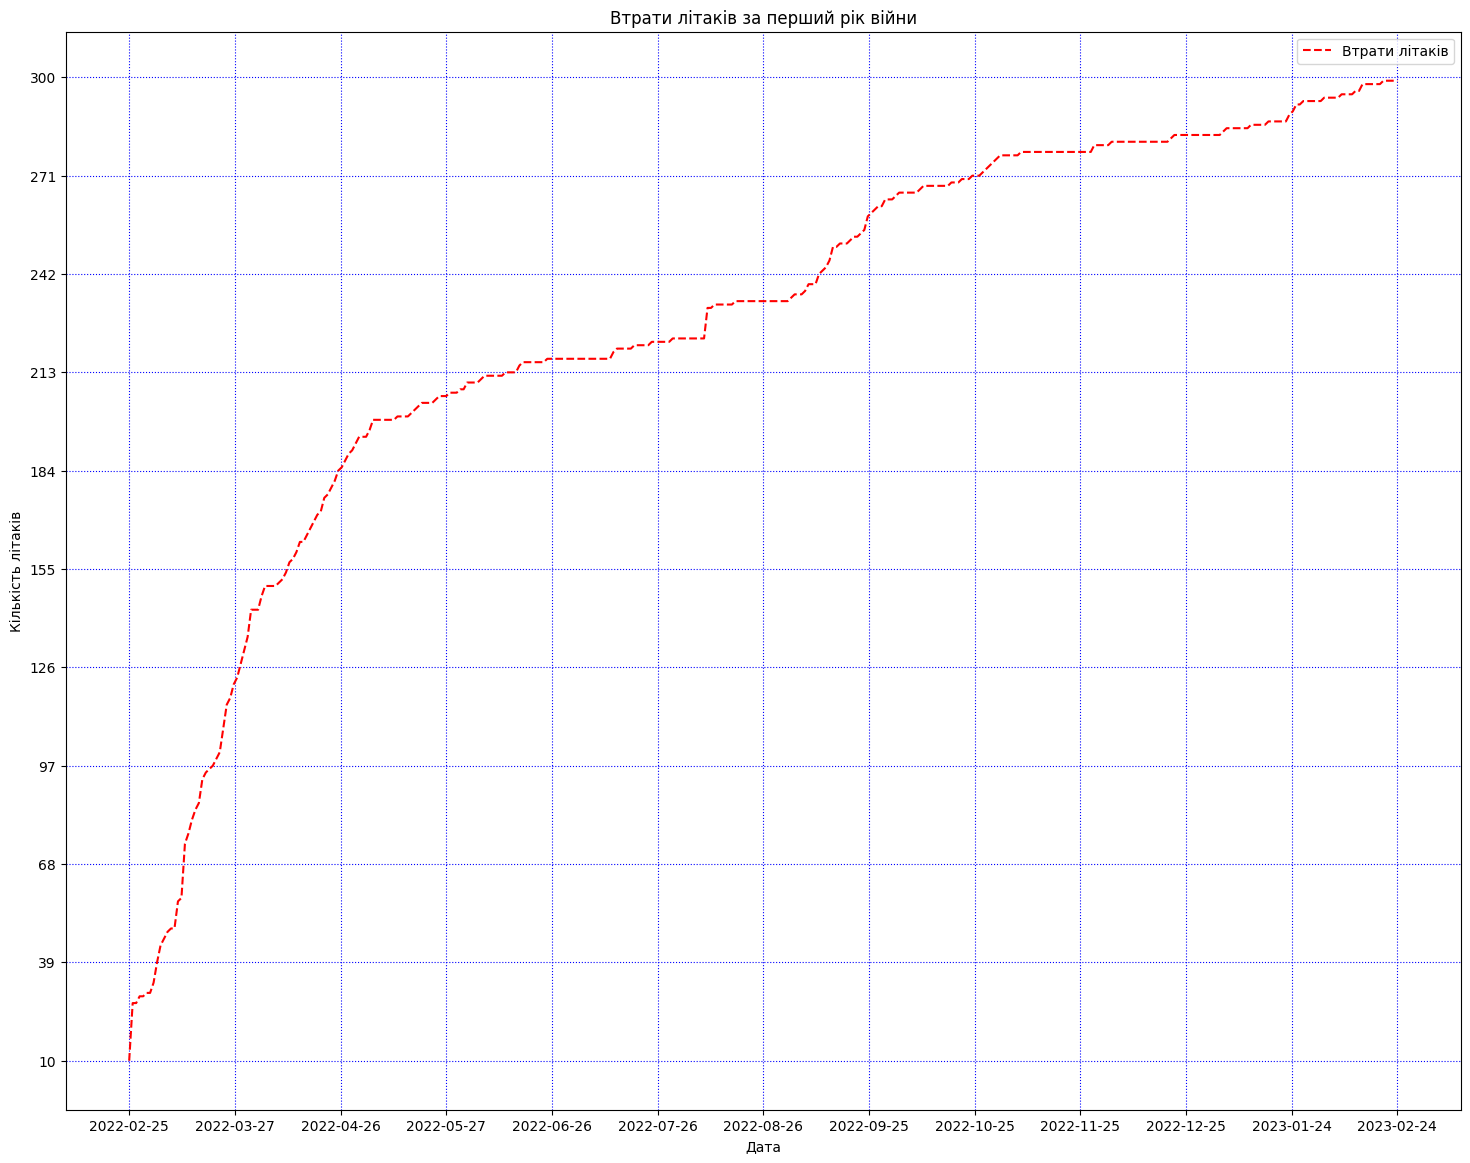

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime

def get_column_values(file_name, column_index):
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  #Пропускаємо перший рядок
        column_values = []
        for row in reader:
            value = row[column_index]
            try:
                # Спробувати конвертувати у дату
                date_value = datetime.strptime(value, '%Y-%m-%d')
                column_values.append(date_value)
            except ValueError:
                try:
                    # Спробувати конвертувати у числове значення
                    numeric_value = float(value)
                    column_values.append(numeric_value)
                except ValueError:
                    # Якщо не вдалося конвертувати, лишити значення як є
                    column_values.append(value)
    return np.array(column_values)

# Знайдення добових втрат літаків
def calculate_daily_losses(aircraft_losses):
    return np.diff(np.insert(aircraft_losses, 0, 0))

def top_n_losses(aircraft_losses, n=3):
    # Знайти індекси втрат в порядку зменшення
    sorted_indices = np.argsort(aircraft_losses)[::-1]
    
    # Взяти три n втрати
    top_losses_indices = sorted_indices[:n]
    
    # Отримати відповідні значення
    top_losses = aircraft_losses[top_losses_indices]
    
    return top_losses

def planes_shot_down(daily_losses, dates, start, end):
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')

    # Вибір індексів для дат в межах вказаного періоду
    dates_indices = np.where((dates >= start_date) & (dates <= end_date))[0]

    # Вибір втрат літаків за вказаний період
    losses = daily_losses[dates_indices]

    # Загальна кількість літаків, які було збито за вказаний період
    total_planes_shot_down = np.sum(losses)

    return total_planes_shot_down

# Знайдення середнього значення втрат авіації за останні X днів війни
def average_losses_last_x_days(daily_losses, number):
    # Вибір останніх X днів втрат
    last_x_days_losses = daily_losses[-number:]
    
    # Обчислення середнього значення
    average_losses = np.mean(last_x_days_losses)
    
    return average_losses

# Створення масиву numpy для стовпця "літак" та "дати"
file_name = 'russia_losses_equipment.csv'
aircraft_losses = get_column_values(file_name, 2)
dates = get_column_values(file_name, 0)
print("Масив numpy зі значень стовпця «літак»:\n", aircraft_losses)

daily_losses = calculate_daily_losses(aircraft_losses)
print("Добові втрати літаків:\n", daily_losses)

# Знайти три найбільших добові втрати
top_3_losses = top_n_losses(daily_losses, n=3)
print("Три найбільші добові втрати літаків:", top_3_losses)

total_planes_shot_down_in_summer_2022 = planes_shot_down(daily_losses, dates, '2022-05-31', '2022-08-31')
print("Кількість літаків, які було збито влітку 2022 року:", total_planes_shot_down_in_summer_2022)

average_losses = average_losses_last_x_days(daily_losses, 300)
print('Середнє значення втрат авіації за останні 300 днів війни:', average_losses)

# Створення графіка втрат літаків за перший рік війни
dates_first_year = dates[:365]
losses_first_year = aircraft_losses[:365]

plt.figure(figsize=(18, 14), dpi=100)
plt.plot(dates_first_year, losses_first_year, label='Втрати літаків', linestyle='dashed', color='red')
plt.title('Втрати літаків за перший рік війни')
plt.xlabel('Дата')
plt.ylabel('Кількість літаків')
plt.legend()
plt.grid(True, color='blue', linestyle=':')
numeric_dates = date2num(dates_first_year)
plt.xticks(np.linspace(min(numeric_dates), max(numeric_dates), 13))
plt.yticks(np.linspace(min(losses_first_year), 300, 11))
plt.savefig('aircraft_losses_first_year.png')
plt.show()